# Problem Statement:-
 #### Given data about COVID-19 patients, write code to visualize the impact and
 #### analyze the trend of rate of infection and recovery as well as make predictions
 #### about the number of cases expected a week in future based on the current
 #### trends.


In [150]:
import numpy as np
import pandas as pd
import plotly.express as px

In [152]:
df=pd.read_csv("covid_19_clean_complete.csv")
df.head()   

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [154]:
df.shape

(49068, 10)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [158]:
df["Country/Region"].nunique()

187

In [160]:
df.duplicated().sum()

0

In [162]:
print(df["Date"].min())
print(df["Date"].max())

2020-01-22
2020-07-27


# Observation- 
* Dataset has 49068 rows and 10 columns.
* Dataset has 187 countries in the data.
* Null values are present only in Province/State column.
* We have no duplicates date in our dateset.
* Dataset has 7 month data from jan to july.

In [165]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


# EDA

#### 1-Visualizing the impact of COVID-19

In [169]:
df.head(1)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean


In [171]:
# Calculating Total Confirmed COVID-19 Cases Over Time Across the Country/Region

In [173]:
total_confirmed_cases_in_countries_by_date=df.groupby("Date")["Confirmed"].agg(["sum"])
total_confirmed_cases_in_countries_by_date

,sum
Date,
2020-01-22,555
2020-01-23,654
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
...,...
2020-07-23,15510481
2020-07-24,15791645
2020-07-25,16047190


In [175]:
# Plotting Total Confirmed COVID-19 Cases Over Time

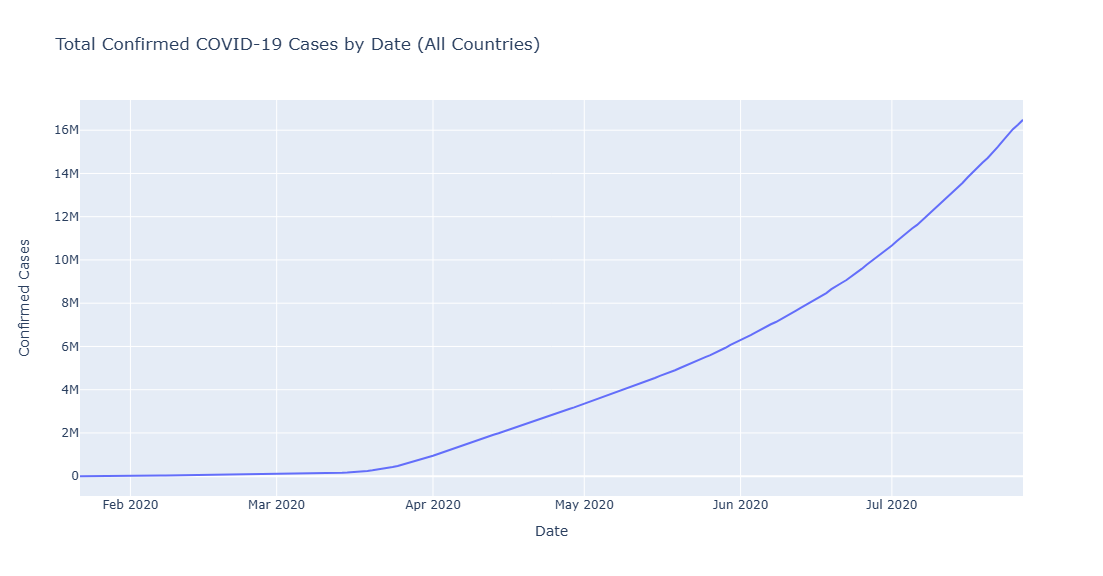

In [177]:
fig=px.line(data_frame=total_confirmed_cases_in_countries_by_date,x=total_confirmed_cases_in_countries_by_date.index,
            y=total_confirmed_cases_in_countries_by_date["sum"],width=1000,height=576,
            title="Total Confirmed COVID-19 Cases by Date (All Countries)")
fig.update_layout(
    yaxis_title="Confirmed Cases"
)
fig.show()

Observation:-
* Confirmed cases are increasing from april rapidly.

In [180]:
# Calculating Total Deaths Due to COVID-19 Over Time Across the Countries

In [182]:
df.head(1)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean


In [184]:
total_deaths_in_countries_by_date=df.groupby("Date")["Deaths"].agg(["sum"])
total_deaths_in_countries_by_date

,sum
Date,
2020-01-22,17
2020-01-23,18
2020-01-24,26
2020-01-25,42
2020-01-26,56
...,...
2020-07-23,633506
2020-07-24,639650
2020-07-25,644517


In [186]:
# Plotting Total Deaths Due to COVID-19 Over Time Across the Countries 

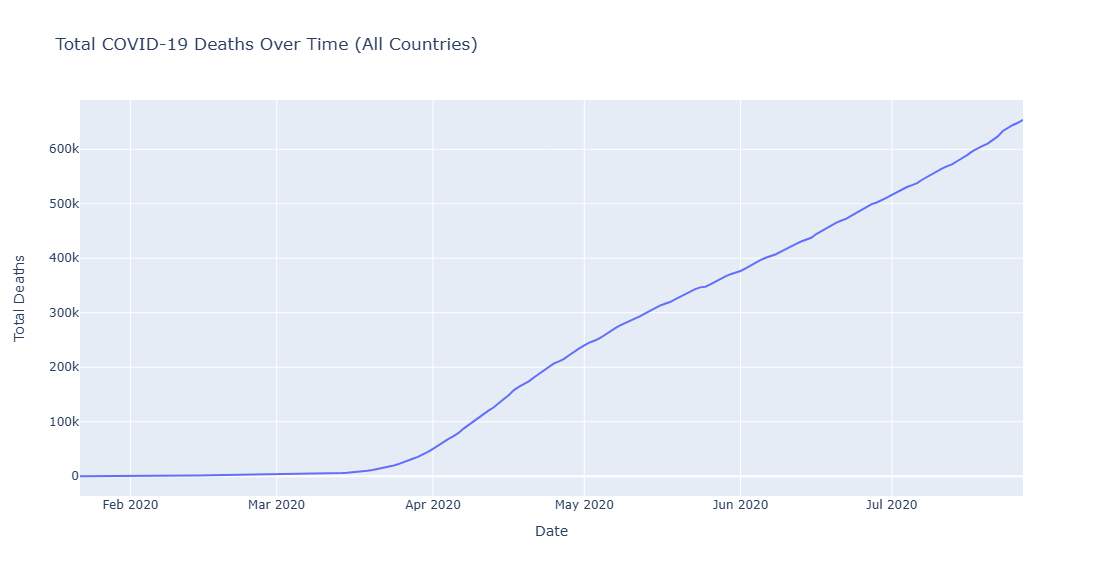

In [188]:
fig=px.line(data_frame=total_deaths_in_countries_by_date,x=total_deaths_in_countries_by_date.index,y=total_deaths_in_countries_by_date["sum"],width=1000,height=576,
            title="Total COVID-19 Deaths Over Time (All Countries)")
fig.update_layout(
    yaxis_title="Total Deaths"
)
fig.show()

Observation:-
* Deaths are also increasing rapidly from the month of April.

In [191]:
# Calculating Total Recoveries from COVID-19 Over Time Across the countries/region

In [193]:
df.head(1)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean


In [195]:
total_recoveries_in_countries_by_date=df.groupby("Date")["Recovered"].agg(["sum"])
total_recoveries_in_countries_by_date

,sum
Date,
2020-01-22,28
2020-01-23,30
2020-01-24,36
2020-01-25,39
2020-01-26,52
...,...
2020-07-23,8710969
2020-07-24,8939705
2020-07-25,9158743


In [197]:
# Plotting Total Recoveries from COVID-19 Over Time

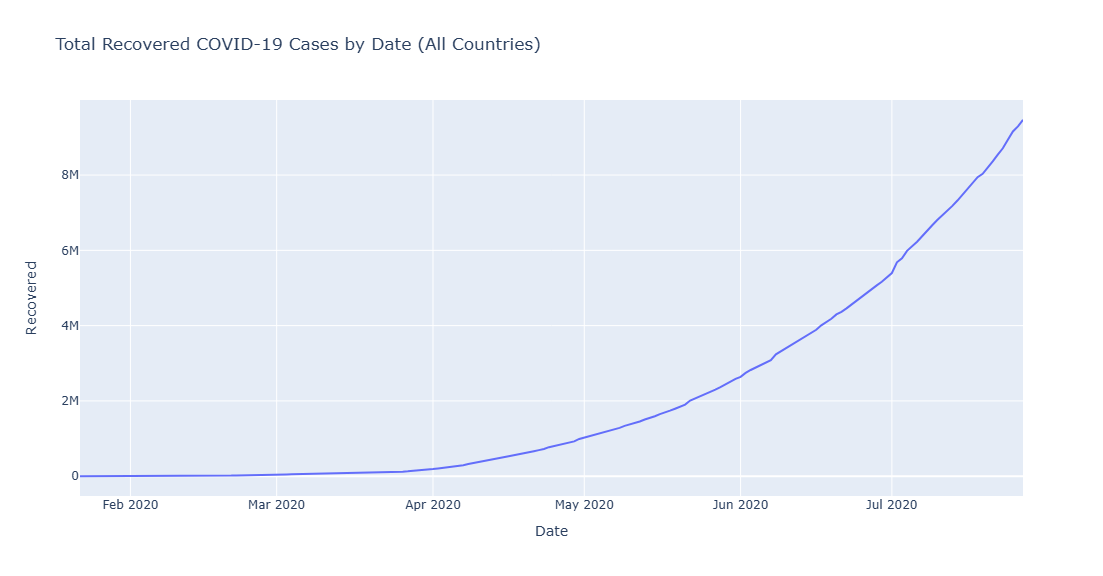

In [199]:
fig=px.line(data_frame=total_recoveries_in_countries_by_date,x=total_recoveries_in_countries_by_date.index,y=total_recoveries_in_countries_by_date["sum"],width=1000,height=576,
            title="Total Recovered COVID-19 Cases by Date (All Countries)")
fig.update_layout(
    yaxis_title="Recovered"
)
fig.show()

Observation:-
As cases are increasing with that recovery is also increasing.

In [202]:
# Calculating Total Active COVID-19 Cases Over Time 

In [204]:
df.head(1)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean


In [206]:
total_activecases_in_countries_by_date=df.groupby("Date")["Active"].agg(["sum"])
total_activecases_in_countries_by_date

,sum
Date,
2020-01-22,510
2020-01-23,606
2020-01-24,879
2020-01-25,1353
2020-01-26,2010
...,...
2020-07-23,6166006
2020-07-24,6212290
2020-07-25,6243930


In [208]:
# Plotting Total Active COVID-19 Cases Over Time

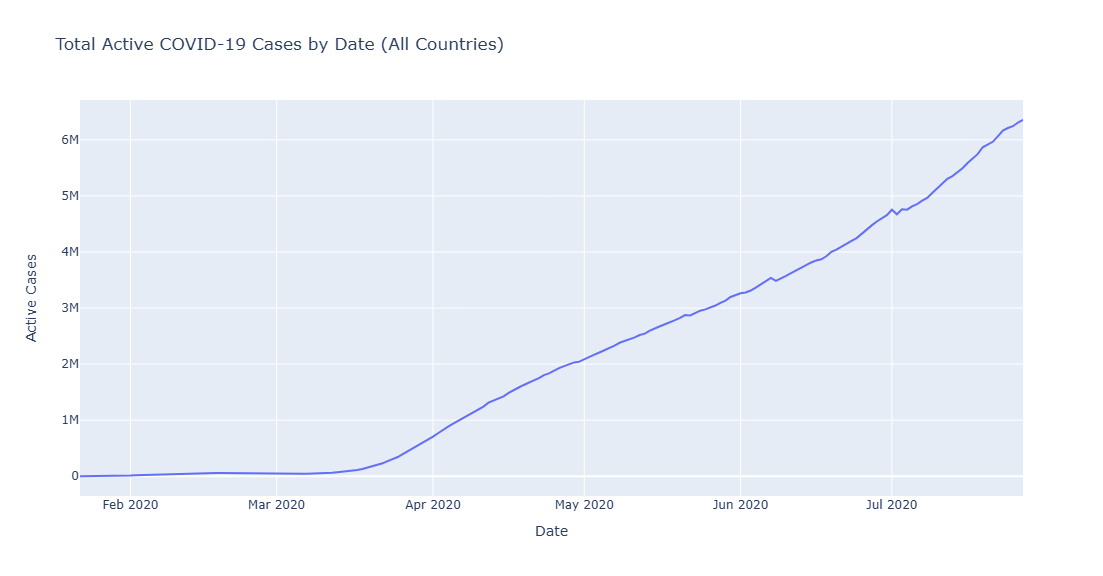

In [210]:
fig=px.line(data_frame=total_activecases_in_countries_by_date,x=total_activecases_in_countries_by_date.index,y=total_activecases_in_countries_by_date["sum"],width=1000,height=576,
            title="Total Active COVID-19 Cases by Date (All Countries)")
fig.update_layout(
    yaxis_title="Active Cases"
)
fig.show()

Observation:-
* Active cases are also increasing rapidly from April but sometimes cases are dropping inbetween.

#### 2- Analyze the trend of infection and recovery rates

In [214]:
# calculating

In [216]:
daily_data = df.groupby("Date")[["Confirmed", "Recovered"]].sum().reset_index()

daily_data

,Date,Confirmed,Recovered
0,2020-01-22,555,28
1,2020-01-23,654,30
2,2020-01-24,941,36
3,2020-01-25,1434,39
4,2020-01-26,2118,52
...,...,...,...
183,2020-07-23,15510481,8710969
184,2020-07-24,15791645,8939705
185,2020-07-25,16047190,9158743
186,2020-07-26,16251796,9293464


In [218]:
# Calculate daily new confirmed and recovered cases
daily_data["Daily_New_Confirmed"] = daily_data["Confirmed"].diff().fillna(0)
daily_data["Daily_New_Recovered"] = daily_data["Recovered"].diff().fillna(0)

In [220]:
daily_data.head()

,Date,Confirmed,Recovered,Daily_New_Confirmed,Daily_New_Recovered
0,2020-01-22,555,28,0.0,0.0
1,2020-01-23,654,30,99.0,2.0
2,2020-01-24,941,36,287.0,6.0
3,2020-01-25,1434,39,493.0,3.0
4,2020-01-26,2118,52,684.0,13.0


In [222]:
# plotting

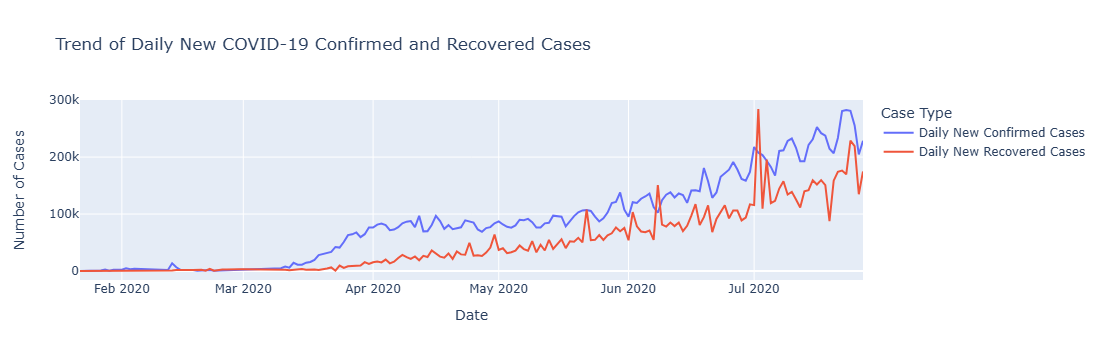

In [224]:
fig = px.line(
    daily_data,
    x="Date",
    y=["Daily_New_Confirmed", "Daily_New_Recovered"],
    labels={
        "value": "Number of Cases",
        "Date": "Date",
        "variable": "Case Type"
    },
    title="Trend of Daily New COVID-19 Confirmed and Recovered Cases"
)

# Rename legend entries for clarity
fig.for_each_trace(lambda t: t.update(name={
    "Daily_New_Confirmed": "Daily New Confirmed Cases",
    "Daily_New_Recovered": "Daily New Recovered Cases"
}[t.name]))

fig.show()

Observation:-
* Most of the time Confirmed cases are more than recovered cases but during the starting of july we can see Recovered cases are more than Confirmed cases.

## Some more EDA

In [228]:
# top5 countries which have highest recovery ?  

In [230]:
df.head(1)     

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean


In [232]:
highest_recovery=df.groupby("Country/Region")["Recovered"].sum().sort_values(ascending=False)[:5]
highest_recovery

Country/Region
US         56353416
Brazil     54492873
Russia     25120448
India      23783720
Germany    17107839
Name: Recovered, dtype: int64

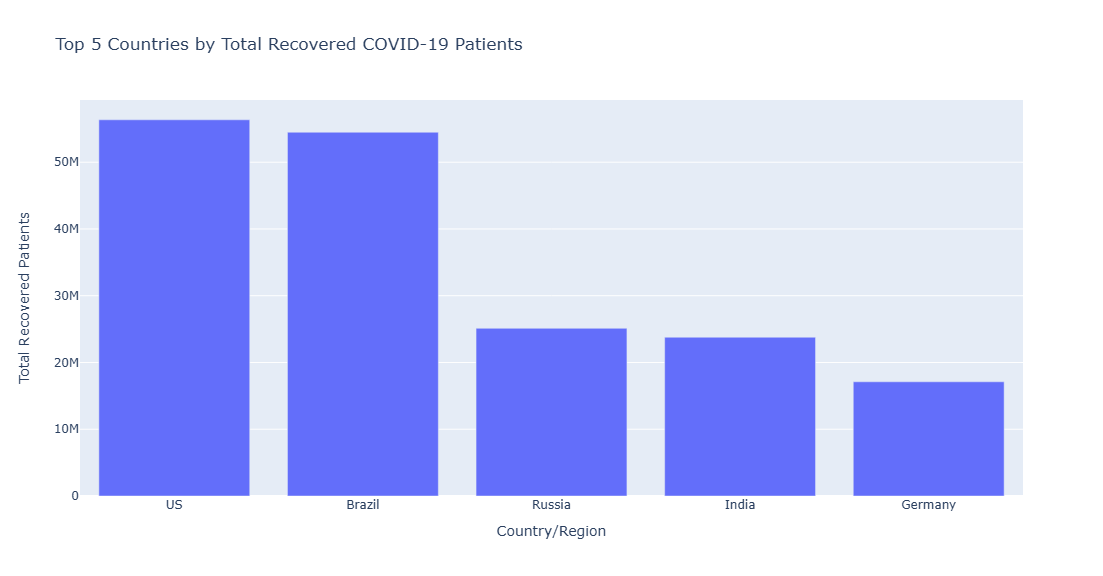

In [234]:
fig=px.bar(x=highest_recovery.index,y=highest_recovery.values,width=1000,height=576,
            title="Top 5 Countries by Total Recovered COVID-19 Patients")
fig.update_layout(
    xaxis_title="Country/Region"
)
fig.update_layout(
    yaxis_title="Total Recovered Patients"
)
fig.show()

Observation-
* US has more number of  total recovered cases.

In [237]:
#top5 countries which have highest death? 

In [239]:
df.head(1)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean


In [241]:
highest_death=df.groupby("Country/Region")["Deaths"].sum().sort_values(ascending=False)[:5]
highest_death

Country/Region
US                11011411
United Kingdom     3997775
Brazil             3938034
Italy              3707717
France             3048524
Name: Deaths, dtype: int64

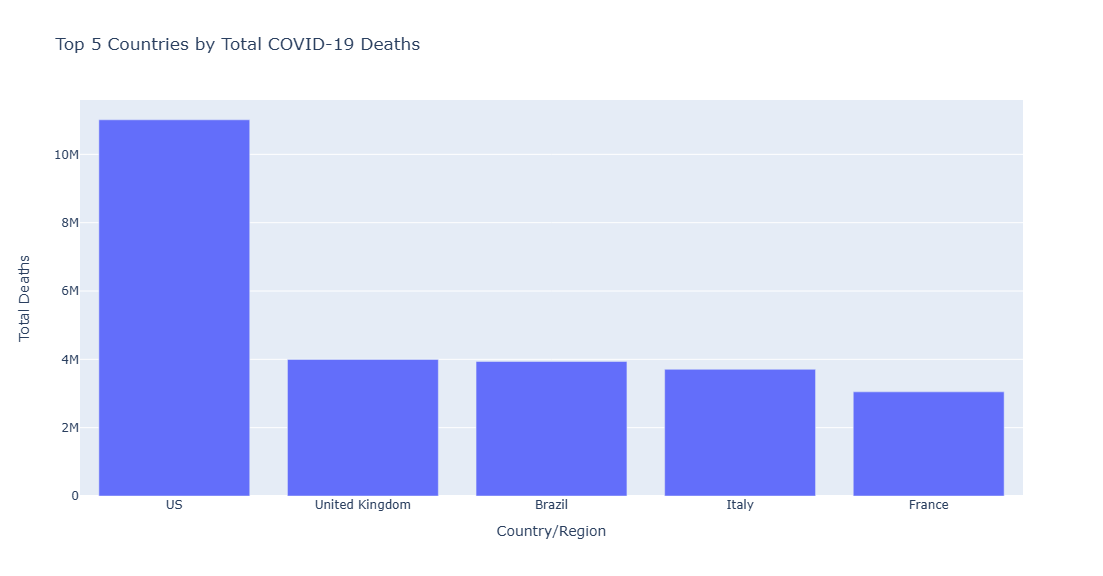

In [243]:
fig=px.bar(x=highest_death.index,y=highest_death.values,width=1000,height=576,
            title="Top 5 Countries by Total COVID-19 Deaths")
fig.update_layout(
    xaxis_title="Country/Region"
)
fig.update_layout(
    yaxis_title="Total Deaths"
)
fig.show()

Observation-
* US has also more number of death cases.

In [246]:
#active cases trend for each region?   

In [248]:
df.head(1)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean


In [250]:
top_active_cases_who_region=df.groupby("WHO Region")["Active"].sum().sort_values(ascending=False)[:5]
top_active_cases_who_region

WHO Region
Americas                 225832458
Europe                   106406678
Eastern Mediterranean     24108160
South-East Asia           23629904
Africa                    10158119
Name: Active, dtype: int64

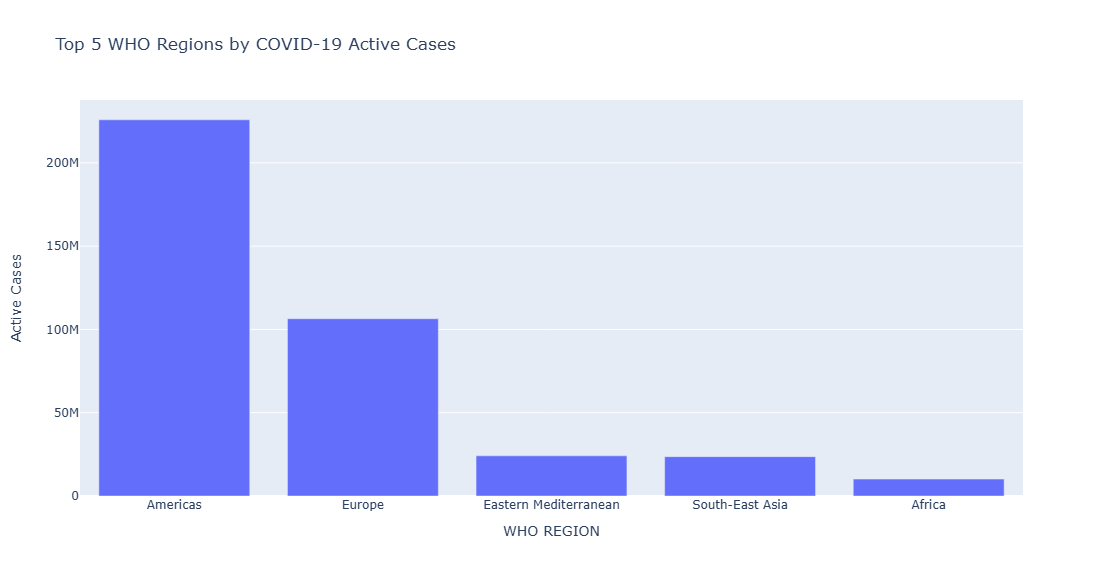

In [252]:
fig=px.bar(x=top_active_cases_who_region.index,y=top_active_cases_who_region.values,width=1000,height=576,
            title="Top 5 WHO Regions by COVID-19 Active Cases")
fig.update_layout(
    xaxis_title="WHO REGION")
fig.update_layout(
    yaxis_title="Active Cases"
)
fig.show()

Observation-
* Americas WHO region has more number of COVID-19 cases.

# Model Building 

In [256]:
# Ther are total 187 countries in our dataset instead of making for all we will make our model for any one country 
# lets select INDIA and predict the active cases for future week days.  

In [258]:
df.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [260]:
df_india=df[df["Country/Region"]=="India"]
df_india.reset_index(drop=True,inplace=True)
df_india.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
1,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
2,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
3,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
4,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia


In [262]:
# let's build our model to predict Active cases.

In [264]:
df_india=df_india[['Date','Active']]
df_india

,Date,Active
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
183,2020-07-23,440298
184,2020-07-24,456234
185,2020-07-25,468002
186,2020-07-26,485277


In [266]:
# Note:- We will convert our Date column name as df and Active column name as y .It is required for prophet model.

In [268]:
df_india=df_india.rename(columns={'Date':'ds','Active':'y'})
df_india.head()

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [270]:
df_india.tail()

,ds,y
183,2020-07-23,440298
184,2020-07-24,456234
185,2020-07-25,468002
186,2020-07-26,485277
187,2020-07-27,495499


In [272]:
df_india["ds"]=pd.to_datetime(df_india["ds"])

In [274]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [276]:
# lets check that is there any missing dates are there in the dataset or not
whole_date=pd.date_range(start=df_india["ds"].min(),end=df_india["ds"].max(),freq="D")
whole_date

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21',
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
               '2020-07-26', '2020-07-27'],
              dtype='datetime64[ns]', length=188, freq='D')

In [278]:
missing_dates=whole_date.difference(df_india["ds"])
missing_dates

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [280]:
# As we can see we dont have any missing values in df_india dataframe

In [282]:
from prophet import Prophet
model_prophet=Prophet()

In [284]:
# training 
model_prophet.fit(df_india)

03:29:31 - cmdstanpy - INFO - Chain [1] start processing
03:29:32 - cmdstanpy - INFO - Chain [1] done processing


In [286]:
#  Now lets create a future dates 
future=model_prophet.make_future_dataframe(periods=7,freq="D")   
future 

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [288]:
forecast=model_prophet.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1117.399795,-14734.141463,12731.920354,-1117.399795,-1117.399795,-483.004780,-483.004780,-483.004780,-483.004780,-483.004780,-483.004780,0.0,0.0,0.0,-1600.404575
1,2020-01-23,-1082.910680,-14459.148336,13445.050366,-1082.910680,-1082.910680,-613.287536,-613.287536,-613.287536,-613.287536,-613.287536,-613.287536,0.0,0.0,0.0,-1696.198216
2,2020-01-24,-1048.421565,-15250.446790,13701.660952,-1048.421565,-1048.421565,-98.814530,-98.814530,-98.814530,-98.814530,-98.814530,-98.814530,0.0,0.0,0.0,-1147.236095
3,2020-01-25,-1013.932449,-14732.835963,12973.321826,-1013.932449,-1013.932449,192.678831,192.678831,192.678831,192.678831,192.678831,192.678831,0.0,0.0,0.0,-821.253618
4,2020-01-26,-979.443334,-13967.611924,14689.522526,-979.443334,-979.443334,1065.489371,1065.489371,1065.489371,1065.489371,1065.489371,1065.489371,0.0,0.0,0.0,86.046037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,466718.102963,451938.764698,479554.260491,466441.125897,466926.907478,-613.287536,-613.287536,-613.287536,-613.287536,-613.287536,-613.287536,0.0,0.0,0.0,466104.815428
191,2020-07-31,474432.338710,459737.362584,487983.486420,473865.182006,474908.002159,-98.814530,-98.814530,-98.814530,-98.814530,-98.814530,-98.814530,0.0,0.0,0.0,474333.524180
192,2020-08-01,482146.574457,469400.143933,496946.237158,481291.276352,482976.090218,192.678831,192.678831,192.678831,192.678831,192.678831,192.678831,0.0,0.0,0.0,482339.253289
193,2020-08-02,489860.810204,476423.109372,505598.269328,488735.771644,490984.261932,1065.489371,1065.489371,1065.489371,1065.489371,1065.489371,1065.489371,0.0,0.0,0.0,490926.299575


Acknowledge that Prophet can produce negative values due to its additive modeling structure.

State that you’ve handled it by replacing negatives with zero, as they don’t make sense in this context.

In [290]:
forecast['yhat'] = forecast['yhat'].clip(lower=0)

In [297]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1117.399795,-14734.141463,12731.920354,-1117.399795,-1117.399795,-483.004780,-483.004780,-483.004780,-483.004780,-483.004780,-483.004780,0.0,0.0,0.0,0.000000
1,2020-01-23,-1082.910680,-14459.148336,13445.050366,-1082.910680,-1082.910680,-613.287536,-613.287536,-613.287536,-613.287536,-613.287536,-613.287536,0.0,0.0,0.0,0.000000
2,2020-01-24,-1048.421565,-15250.446790,13701.660952,-1048.421565,-1048.421565,-98.814530,-98.814530,-98.814530,-98.814530,-98.814530,-98.814530,0.0,0.0,0.0,0.000000
3,2020-01-25,-1013.932449,-14732.835963,12973.321826,-1013.932449,-1013.932449,192.678831,192.678831,192.678831,192.678831,192.678831,192.678831,0.0,0.0,0.0,0.000000
4,2020-01-26,-979.443334,-13967.611924,14689.522526,-979.443334,-979.443334,1065.489371,1065.489371,1065.489371,1065.489371,1065.489371,1065.489371,0.0,0.0,0.0,86.046037


In [299]:
final_forecast=forecast[['ds','yhat','yhat_lower','yhat_upper']]
final_forecast

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,0.000000,-14734.141463,12731.920354
1,2020-01-23,0.000000,-14459.148336,13445.050366
2,2020-01-24,0.000000,-15250.446790,13701.660952
3,2020-01-25,0.000000,-14732.835963,12973.321826
4,2020-01-26,86.046037,-13967.611924,14689.522526
...,...,...,...,...
190,2020-07-30,466104.815428,451938.764698,479554.260491
191,2020-07-31,474333.524180,459737.362584,487983.486420
192,2020-08-01,482339.253289,469400.143933,496946.237158
193,2020-08-02,490926.299575,476423.109372,505598.269328


In [301]:
final_forecast[final_forecast["ds"]=="2020-07-27"]

,ds,yhat,yhat_lower,yhat_upper
187,2020-07-27,444634.129168,429711.187733,458056.571122


C:\Users\Lenovo\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



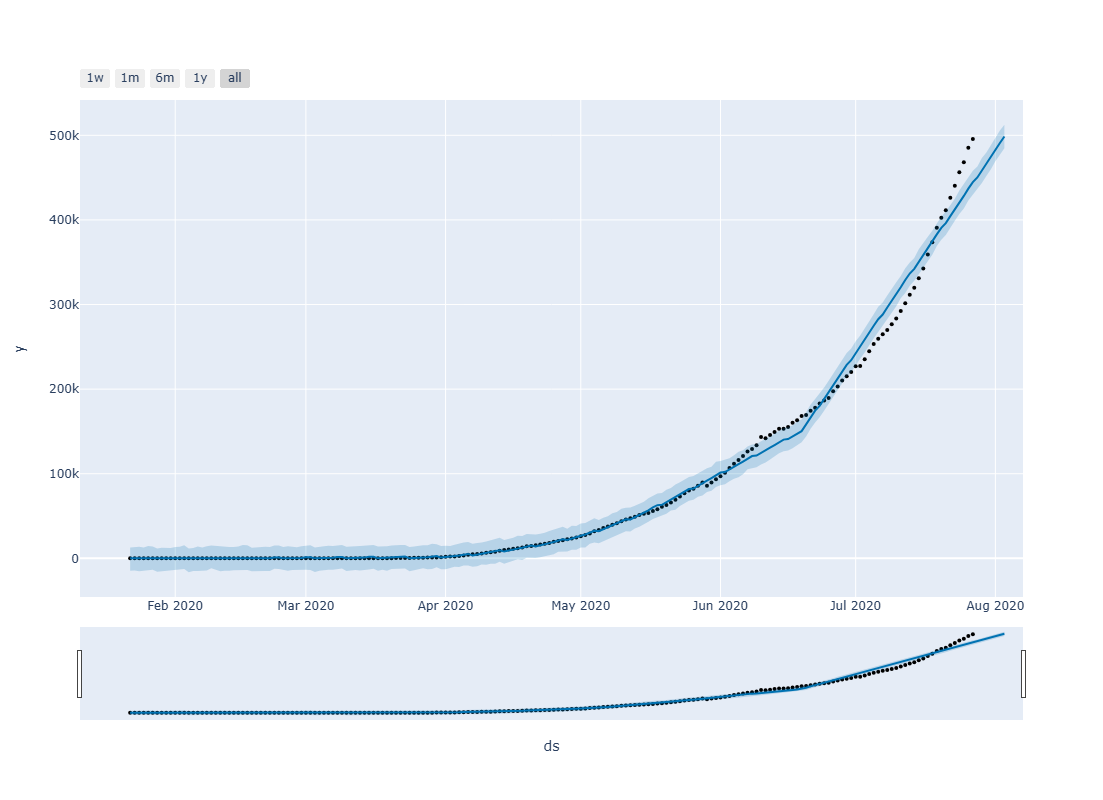

In [303]:
# lets plot it with plotly
from prophet.plot import plot_plotly
fig = plot_plotly(model_prophet, final_forecast)
fig.update_layout(width=1100, height=800)
fig.show()

### Note:- Blue one is predicted line while the black one is actual cases.